In [34]:
import gzip
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

DATASET_DIR = "dataset"
MNIST_TRAIN_IMS_GZ = os.path.join(DATASET_DIR, "train-images-idx3-ubyte.gz")
MNIST_TRAIN_LBS_GZ = os.path.join(DATASET_DIR, "train-labels-idx1-ubyte.gz")
MNIST_TEST_IMS_GZ = os.path.join(DATASET_DIR, "t10k-images-idx3-ubyte.gz")
MNIST_TEST_LBS_GZ = os.path.join(DATASET_DIR, "t10k-labels-idx1-ubyte.gz")

NROWS = 28
NCOLS = 28

In [35]:
def load_data():

    print("Unpacking training images ...")
    with gzip.open(MNIST_TRAIN_IMS_GZ, mode='rb') as f:
        magic_num, train_sz, nrows, ncols = struct.unpack('>llll', f.read(16))
        print("magic number: %d, num of examples: %d, rows: %d, columns: %d" %
        (magic_num, train_sz, nrows, ncols))
        data_bn = f.read()
        data = struct.unpack('<'+'B'*train_sz*nrows*ncols, data_bn)
        train_ims = np.asarray(data)
        train_ims = train_ims.reshape(train_sz, nrows*ncols)
    print("~"*5)

    print("Unpacking training labels ...")
    with gzip.open(MNIST_TRAIN_LBS_GZ, mode='rb') as f:
        magic_num, train_sz = struct.unpack('>ll', f.read(8))
        print("magic number: %d, num of examples: %d" % (magic_num, train_sz))
        data_bn = f.read()
        data = struct.unpack('<'+'B'*train_sz, data_bn)
        train_lbs = np.asarray(data)
    print("~"*5)

    print("Unpacking test images ...")
    with gzip.open(MNIST_TEST_IMS_GZ, mode='rb') as f:
        magic_num, test_sz, nrows, ncols = struct.unpack('>llll', f.read(16))
        print("magic number: %d, num of examples: %d, rows: %d, columns: %d" % (magic_num, train_sz, nrows, ncols))
        data_bn = f.read()
        data = struct.unpack('<'+'B'*test_sz*nrows*ncols, data_bn)
        test_ims = np.asarray(data)
        test_ims = test_ims.reshape(test_sz, nrows*ncols)
    print("~"*5)
    
    print("Unpacking test labels ...")
    with gzip.open(MNIST_TEST_LBS_GZ, mode='rb') as f:
        magic_num, test_sz = struct.unpack('>ll', f.read(8))
        print("magic number: %d, num of examples: %d" % (magic_num, train_sz))
        data_bn = f.read()
        data = struct.unpack('<'+'B'*test_sz, data_bn)
        test_lbs = np.asarray(data)
    print("~"*5)
    
    return train_ims, train_lbs, test_ims, test_lbs

In [36]:
train_ims, train_lbs, test_ims, test_lbs = load_data()

Unpacking training images ...
magic number: 2051, num of examples: 60000, rows: 28, columns: 28
~~~~~
Unpacking training labels ...
magic number: 2049, num of examples: 60000
~~~~~
Unpacking test images ...
magic number: 2051, num of examples: 60000, rows: 28, columns: 28
~~~~~
Unpacking test labels ...
magic number: 2049, num of examples: 60000
~~~~~


In [37]:
# Q1
print(train_ims.shape)
print(train_lbs.shape)
print(test_ims.shape)
print(test_lbs.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


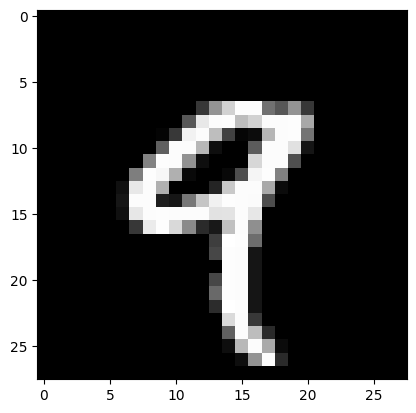

9


In [38]:
# Q2
train_ims_unvectorized = train_ims[4].reshape(28, 28)
plt.imshow(train_ims_unvectorized, cmap='gray')
plt.show()
print(train_lbs[4])

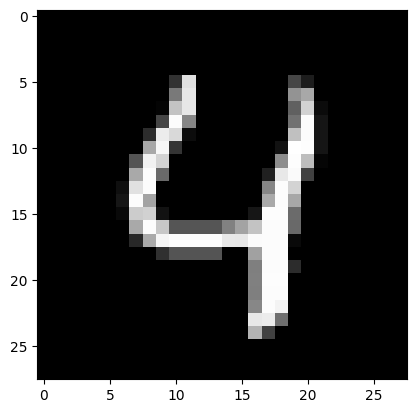

4


In [39]:
# Q3
test_ims_unvectorized = test_ims[4].reshape(28, 28)
plt.imshow(test_ims_unvectorized, cmap='gray')
plt.show()
print(test_lbs[4])

In [40]:
# Q4
mask_train = np.logical_or(train_lbs == 0, train_lbs == 1)
train_ims = train_ims[mask_train,:]
train_lbs = train_lbs[mask_train]

print(len(train_lbs)) # 12665 SAMPLES ARE LEFT AFTER FILTERING

12665


In [41]:
# Q5
mask_test = np.logical_or(test_lbs == 0, test_lbs == 1)
test_ims = test_ims[mask_test,:]
test_lbs = test_lbs[mask_test]

print(len(test_lbs)) # 2115 SAMPLES ARE LEFT AFTER FILTERING

2115


In [42]:
# Q6
val_ims = train_ims[int(0.8*train_ims.shape[0]):, :]
train_ims = train_ims[:int(0.8*train_ims.shape[0]), :]

val_lbs = train_lbs[int(0.8*train_lbs.shape[0]):]
train_lbs = train_lbs[:int(0.8*train_lbs.shape[0])]

# Q9
num_training_samples = len(train_lbs)
num_val_samples = len(val_lbs)

print(num_training_samples) # 2533 SAMPLES ARE IN THE TRAINING SET
print(num_val_samples) # 2533 SAMPLES ARE IN THE VALIDATION SET

10132
2533


In [43]:
# Q7
train_ims = train_ims.astype('float32')
val_ims   = val_ims.astype('float32')
test_ims  = test_ims.astype('float32')

train_lbs = train_lbs.astype('float32')
val_lbs   = val_lbs.astype('float32')
test_lbs  = test_lbs.astype('float32')

# normalize ims
train_ims /= 255.0
val_ims /= 255.0
test_ims /= 255.0

In [44]:
# Q8
train_lbs = train_lbs * 2 - 1
val_lbs = val_lbs * 2 - 1
test_lbs = test_lbs * 2 - 1
weights = np.random.normal(0.0, 1.0, size=(NROWS * NCOLS))

In [45]:
# Q10, Q11
eta = 0.05 # this is a scalar variable for the learning rate, choose a suitable value
           # 0.05 is the best i found

for idx in range(num_training_samples):

    x = train_ims[idx,:] # read the i-th image
    y_true = train_lbs[idx] # read the i-th label

    y_pred = np.dot(weights.T, x) # implement the prediction formula, use np.dot function if you prefer
    error = y_true - y_pred # implement the error formula
    update = eta * error * x
    weights += update

    # every 100 step we want to check the accuracy over the validation data
    acc_count = 0 # we will store the number of correct predictions

    if idx % 100 == 0:

        for val_idx in range(num_val_samples):

            x = val_ims[val_idx,:]
            y_true = val_lbs[val_idx]

            y_pred = np.dot(weights.T, x) # predict the label of the sample

            # if prediction is correct, increase the counter
            pred_label = 1.0 if y_pred >= 0 else -1.0
            if pred_label == y_true:
                acc_count += 1

        accuracy = acc_count * 100. / num_val_samples
        print(f"step: {idx}, acc: {accuracy:.2f}")

        # if accuracy is above 90%, terminate by using “break”
        if accuracy > 95.0:
            break

step: 0, acc: 48.20
step: 100, acc: 8.25
step: 200, acc: 90.92
step: 300, acc: 0.95
step: 400, acc: 48.20
step: 500, acc: 64.00
step: 600, acc: 51.80
step: 700, acc: 48.16
step: 800, acc: 36.52
step: 900, acc: 36.99
step: 1000, acc: 55.27
step: 1100, acc: 95.89


In [46]:
# Q12
num_test_samples = len(test_lbs)
acc_test_count = 0

for test_idx in range(num_test_samples):

    x = test_ims[test_idx,:]
    y_true = test_lbs[test_idx]

    y_pred = np.dot(weights.T, x) # predict the label of the sample

    # if prediction is correct, increase the counter
    pred_label = 1.0 if y_pred >= 0 else -1.0
    if pred_label == y_true:
        acc_test_count += 1

test_accuracy = acc_test_count * 100. / num_test_samples
print(f"test acc: {test_accuracy:.2f}")

test acc: 96.69


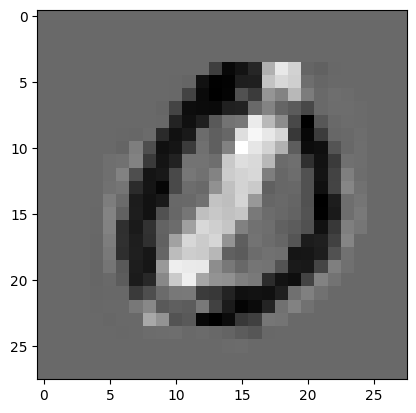

In [ ]:
# Q13
weights = weights.reshape(28, 28)
weights = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))

plt.imshow(weights, cmap='gray')
plt.show()

# Q14
# It looks sort of like a 0 but it seems like the weights at the center are lower.
# Also there are kind of three sections of white and black that slightly resemble 1 as well.